# VISUALIZATION
* MATPLOTLIB
* SEABORN
* PLOTLY
* Widgets

<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

In [56]:
import pandas as pd
df = pd.read_csv("Car_Insurance_Claim.csv").head()

base1 = df.drop(df.columns[[0]], axis=1)

duplicate_rows = df[df.duplicated()] #перевіряю чи є дублікати

if not duplicate_rows.empty:
    print(f"Знайдено {len(duplicate_rows)} дублікатів:")
    display(duplicate_rows) 
else:
    print("Дублікати не знайдено.")
#в результаті дублікатів не виявлено, тому додаткові дії не потрібні.
base1

Дублікати не знайдено.


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [75]:
df.info()
df.describe()
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5 non-null      int64 
 1   ID                   5 non-null      int64 
 2   AGE                  5 non-null      object
 3   GENDER               5 non-null      object
 4   RACE                 5 non-null      object
 5   DRIVING_EXPERIENCE   5 non-null      object
 6   EDUCATION            5 non-null      object
 7   INCOME               5 non-null      object
 8   CREDIT_SCORE         5 non-null      object
 9   VEHICLE_OWNERSHIP    5 non-null      object
 10  VEHICLE_YEAR         5 non-null      object
 11  MARRIED              5 non-null      object
 12  CHILDREN             5 non-null      object
 13  POSTAL_CODE          5 non-null      object
 14  ANNUAL_MILEAGE       5 non-null      object
 15  VEHICLE_TYPE         5 non-null      object
 16  SPEEDING_VIO

<Axes: xlabel='AGE', ylabel='Count'>

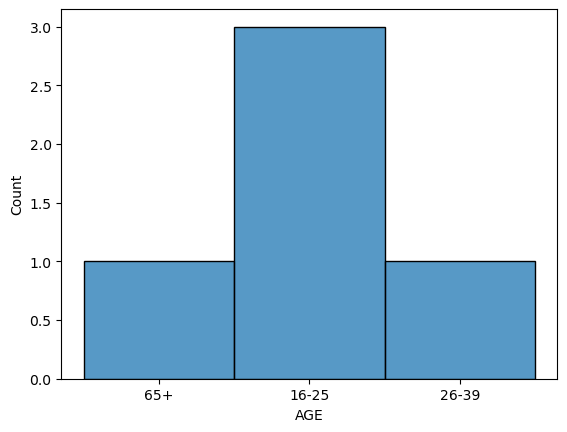

In [69]:
import seaborn as sns
sns.histplot(df['AGE'])

<Axes: xlabel='AGE'>

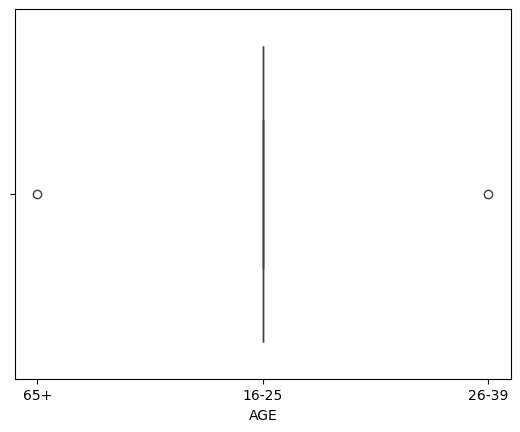

In [72]:
sns.boxplot(x=df['AGE'])

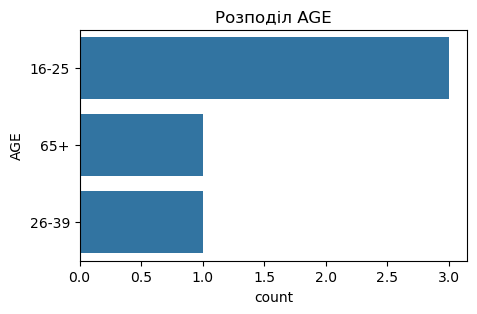

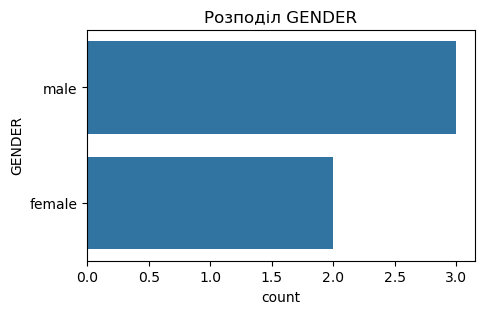

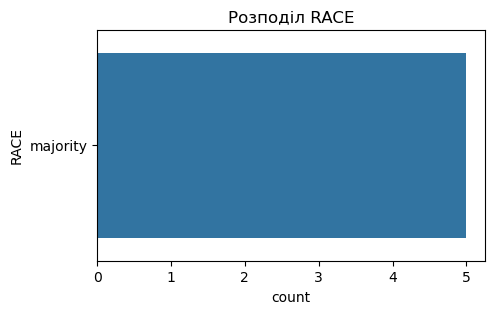

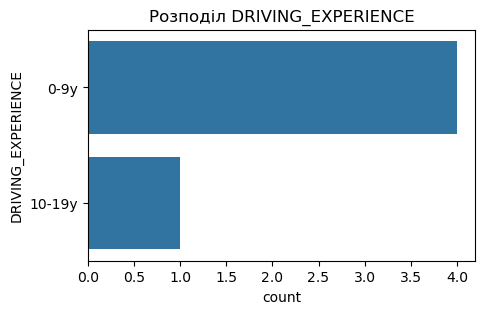

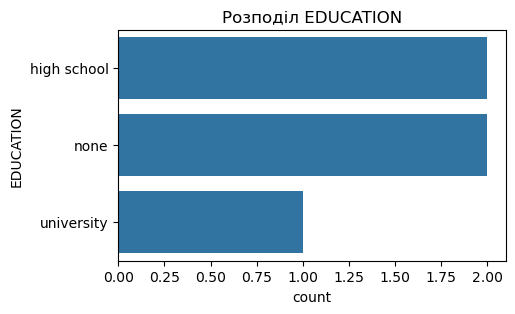

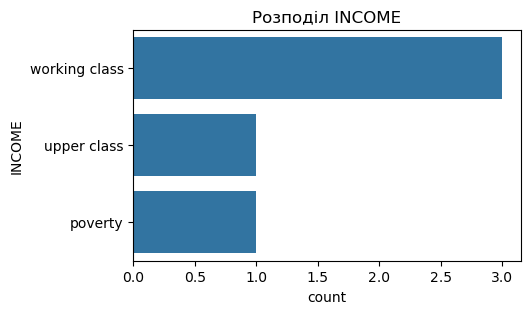

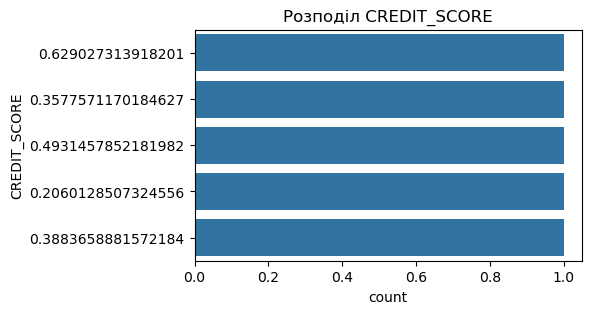

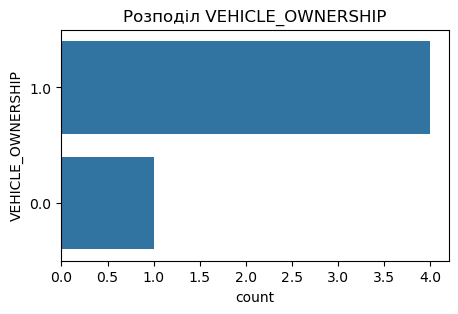

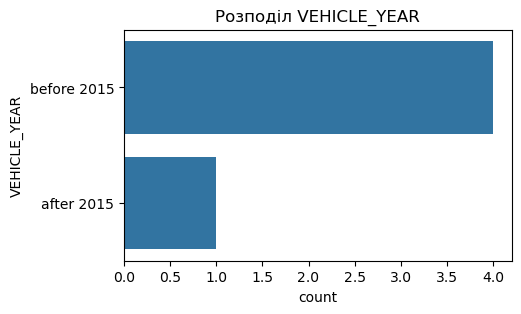

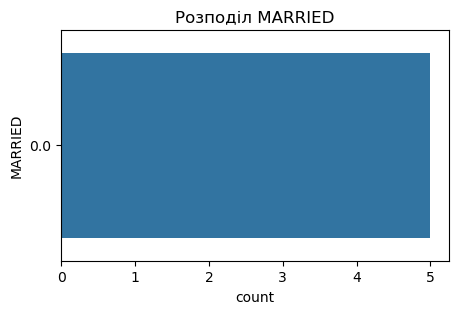

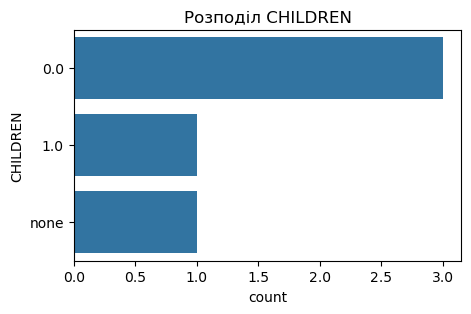

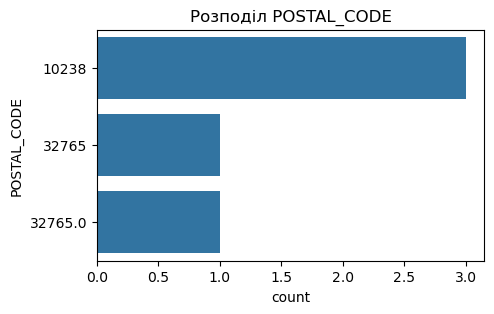

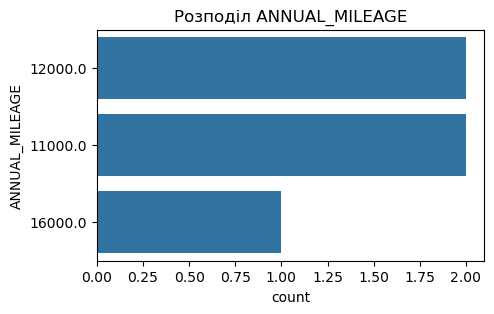

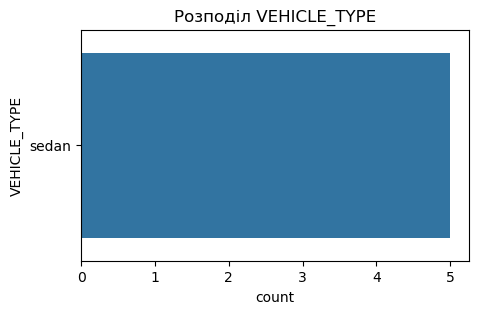

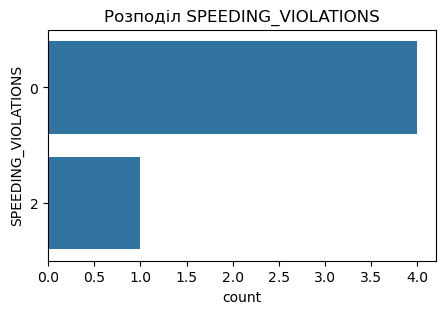

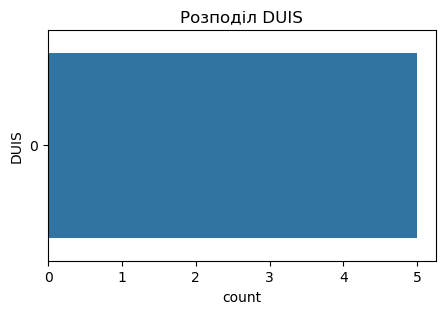

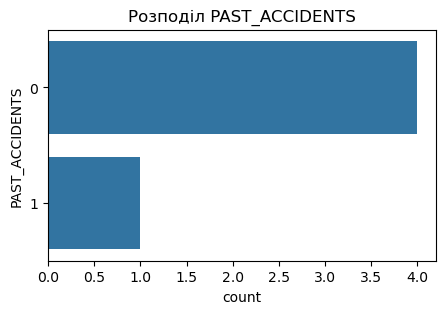

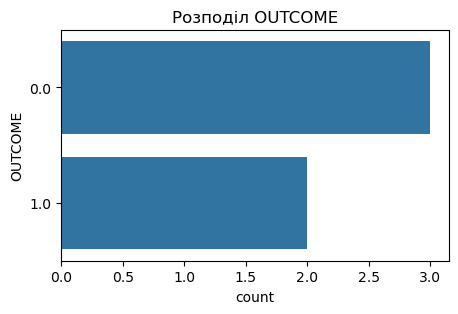

In [81]:
import numpy as np

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Розподіл {col}')
    plt.show()

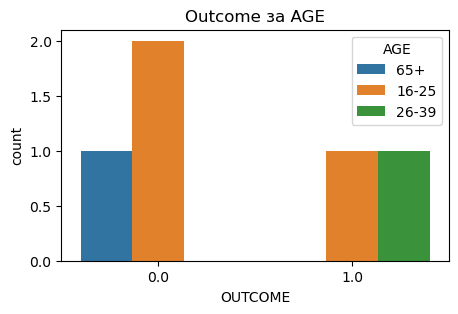

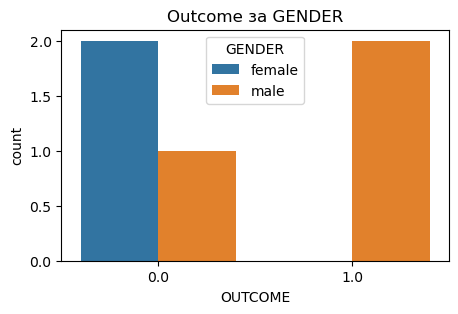

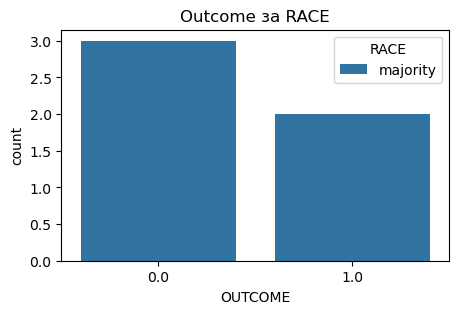

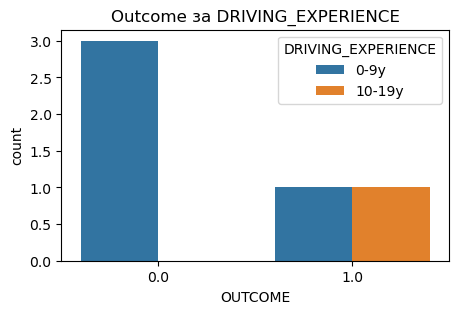

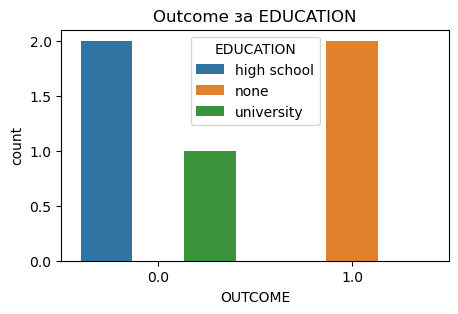

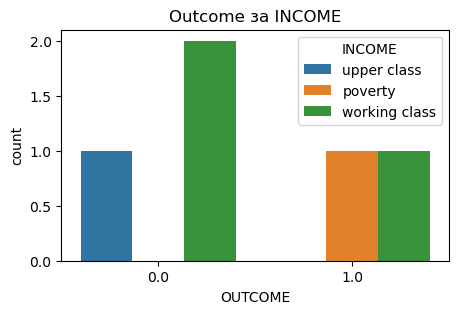

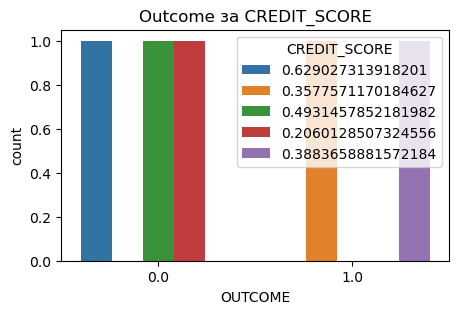

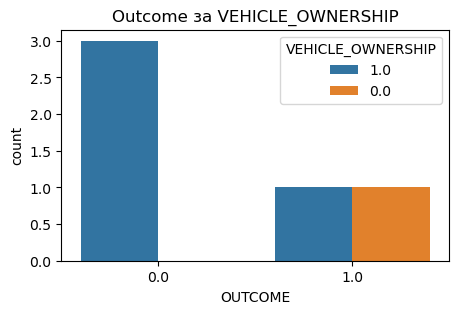

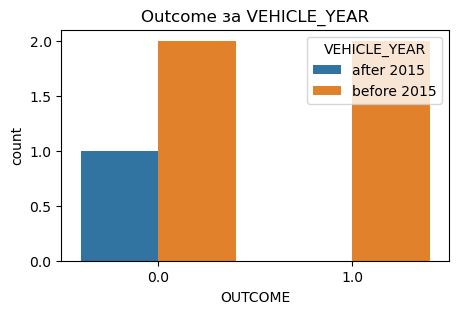

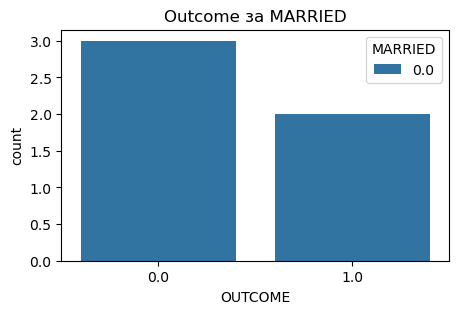

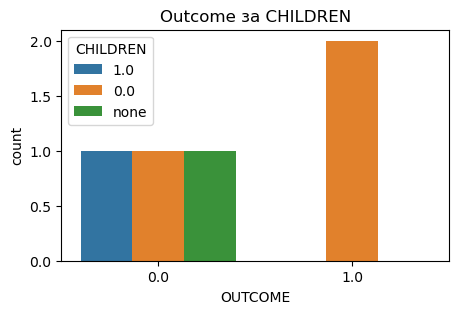

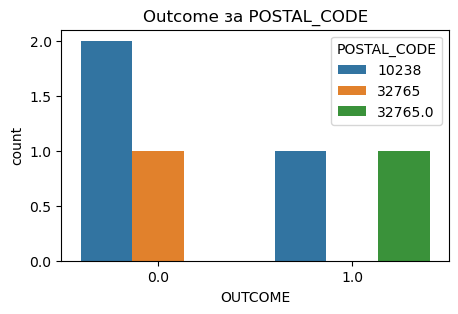

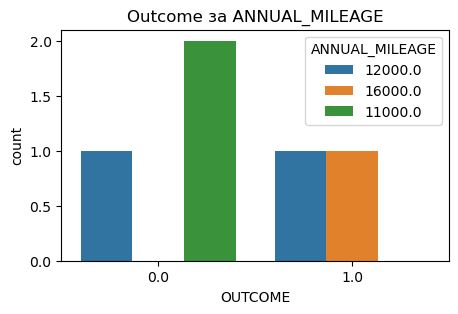

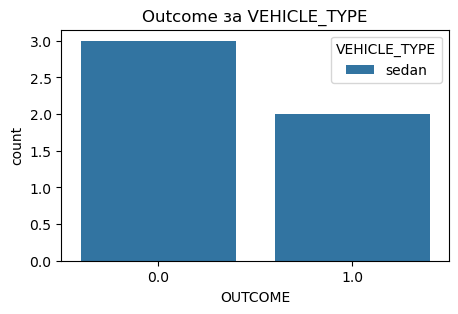

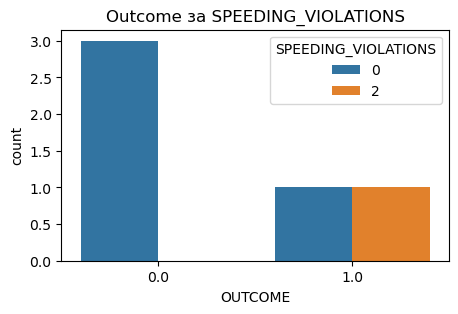

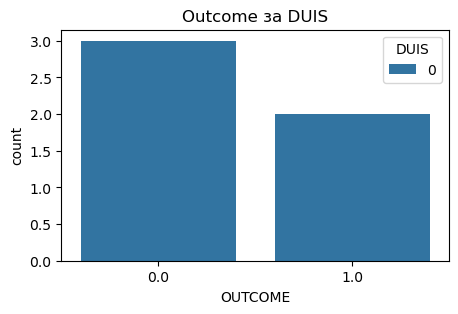

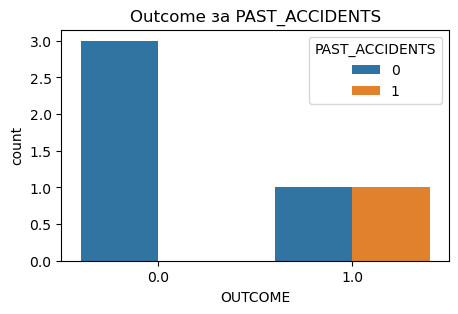

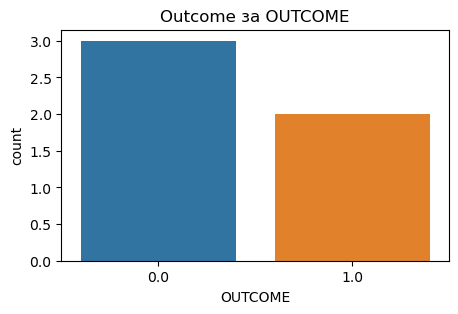

In [82]:
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x='OUTCOME', hue=col, data=df)
    plt.title(f'Outcome за {col}')
    plt.show()

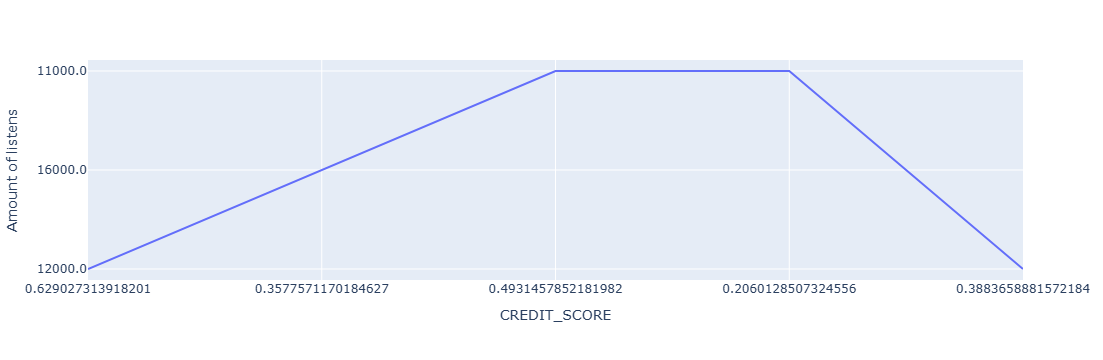

In [97]:
import plotly.express as px
fig = px.line(df, x="CREDIT_SCORE", y="ANNUAL_MILEAGE")
fig.update_yaxes({"title":"Amount of listens"})
fig.show()

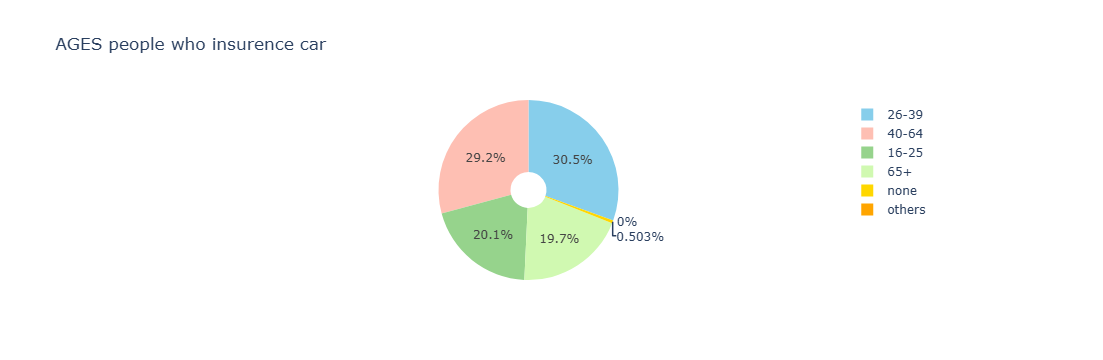

In [103]:
import plotly.graph_objects as go
full_list=pd.read_csv("Car_Insurance_Claim.csv")
dff = full_list['AGE'].value_counts()[:10]
dff = pd.concat([dff, pd.Series({"others": full_list['AGE'].value_counts()[10:].sum()})])
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']

trace = go.Pie(labels=label, values=size, marker=dict(colors=colors), hole=0.2)

data = [trace]
layout = go.Layout(
    title='AGES people who insurence car'
)

fig = go.Figure(data=data, layout=layout)
fig.show()